In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


0.5
Total number of transactions in resampled data:  38
Number transactions train dataset:  781
Number transactions test dataset:  336
Total number of transactions:  1117

Number transactions train dataset:  26
Number transactions test dataset:  12
Total number of transactions:  38
---------------------
C parameter: 0.01
---------------------

Iteration 1 :recall score= 1.0
Iteration 2 :recall score= 0.6
Iteration 3 :recall score= 0.5
Iteration 4 :recall score= 0.6666666666666666
Iteration 5 :recall score= 0.6666666666666666

Mean Recall Score: 0.6866666666666666

---------------------
C parameter: 0.1
---------------------



/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Iteration 1 :recall score= 1.0
Iteration 2 :recall score= 0.8
Iteration 3 :recall score= 0.5
Iteration 4 :recall score= 0.6666666666666666
Iteration 5 :recall score= 0.3333333333333333

Mean Recall Score: 0.6599999999999999

---------------------
C parameter: 1
---------------------

Iteration 1 :recall score= 1.0
Iteration 2 :recall score= 0.6
Iteration 3 :recall score= 0.5
Iteration 4 :recall score= 0.6666666666666666
Iteration 5 :recall score= 0.3333333333333333

Mean Recall Score: 0.62

---------------------
C parameter: 10
---------------------

Iteration 1 :recall score= 1.0
Iteration 2 :recall score= 1.0
Iteration 3 :recall score= 1.0
Iteration 4 :recall score= 1.0
Iteration 5 :recall score= 0.3333333333333333

Mean Recall Score: 0.8666666666666666

---------------------
C parameter: 100
---------------------

Iteration 1 :recall score= 1.0
Iteration 2 :recall score= 1.0
Iteration 3 :recall score= 1.0
Iteration 4 :recall score= 1.0
Iteration 5 :recall score= 0.6666666666666666



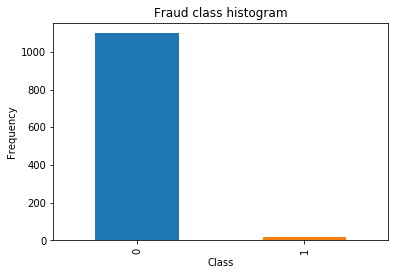

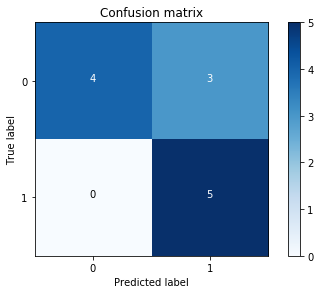

Recall metric in the testing dataset:  1.0


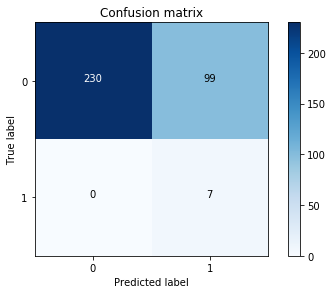

Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.6
Recall metric in the testing dataset:  0.4


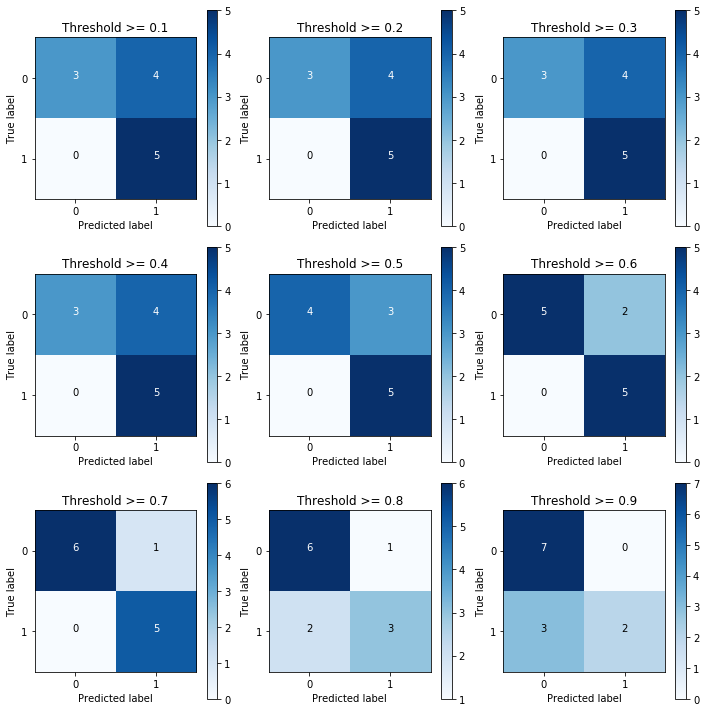

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data1=pd.read_csv('sfc.csv')
data1.head()

data1.shape
data1.dtypes

data = data1.select_dtypes(include=[np.number])


count_classes=pd.value_counts(data["Class"],sort=True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("defect class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

from sklearn.preprocessing import StandardScaler

data['normSGC']=StandardScaler().fit_transform(data['SGC'].values.reshape(-1,1))

data=data.drop(['SGC'],axis=1)
# print(data.head())

#特征数据
X=data.loc[:,data.columns!='Class']

y=data.loc[:,data.columns=='Class']
# print(y)

number_records_fraud = len(data[data.Class==1]) 
#print (number_records_fraud)  
#print (data[data.Class == 1].index)
fraud_indices = np.array(data[data.Class == 1].index)   
#print (fraud_indices)
normal_indices = data[data.Class == 0].index   
random_normal_indices =np.random.choice(normal_indices,number_records_fraud,replace = False) 
random_normal_indices = np.array(random_normal_indices)
#print (len(random_normal_indices))  
 
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])  
#print (under_sample_indices)   
under_sample_data = data.iloc[under_sample_indices,:]  
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']  #下采样后的训练集
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']   #下采样后的标签
 
print (len(under_sample_data[under_sample_data.Class==1])/len(under_sample_data)) # 正负样本的比例都是 0.5
# print(X_undersample)
print("Total number of transactions in resampled data: ", len(under_sample_data))



# from imblearn.over_sampling import SMOTE

# #构造特征数据
# oversampler=SMOTE(random_state=0)
# X_oversample,y_oversample=oversampler.fit_sample(X,y.values.reshape(-1,1))

# ##查看数据
# print('异常值个数:',len(y_oversample[y_oversample==1]))
# print('正常值个数:',len(y_oversample[y_oversample==0]))













from sklearn.cross_validation import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))


# #切分原始数据：test_size--测试集比率
# #random_state = 0  --每次随机得到的数据集是一样的
# X_train_oversample,X_test_oversample,y_train_oversample,y_test_oversample=train_test_split(X_oversample,y_oversample,test_size=0.2,random_state=0)

# #查看数据
# print('过采样训练集数据个数：',len(X_train_oversample))
# print('过采样测试集数据个数：',len(X_test_oversample))








#Recall = TP/(TP+FN)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report 



def printing_Kfold_scores(x_train_data,y_train_data):
    fold=KFold(len(y_train_data),5,shuffle=False)
    #将训练集分为5折，用enumerate函数以后得到的是索引iteration和分集列表indices（一串[训练集，验证集]组成，它们都属于x_train_data即原来的训练集）
    c_param_range=[0.01,0.1,1,10,100] #设定惩罚力度的列表（惩罚是为了使theta分布波动性更大的模型有较小的比重，通过增大其损失函数）
    #下面设定一个result table，用来存放每个惩罚力度下的召回率的值
    results_table=pd.DataFrame(index=range(len(c_param_range),2),columns=["C_parameter","Mean recall score"])
    results_table["C_parameter"]=c_param_range
    j=0
    for c_param in c_param_range:
        print("---------------------")
        print("C parameter:",c_param)
        print("---------------------")
        print('')
        
        recall_accs=[]
        for iteration,indices in enumerate(fold,start=1):
            lr=LogisticRegression(C=c_param,penalty="l1") #LogisticRegression的参数：惩罚力度和惩罚方式
            
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel()) 
            #每次的训练集找的是x_train_data中indices[0]中提到的观测值
            
            y_pred_undersample=lr.predict(x_train_data.iloc[indices[1],:].values)
            
            recall_acc=recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            #计算召回率，recall_score的两个参数：验证集上面实际的y的值，建模预测的y的值
            recall_accs.append(recall_acc)
            
            print("Iteration",iteration,":recall score=",recall_acc)
            
        results_table.loc[j,"Mean recall score"]=np.mean(recall_accs) #记录每一次验证的召回率
        j += 1
        print("")
        print("Mean Recall Score:",np.mean(recall_accs))
        print("")
        
    #找出使召回率最大的惩罚力度C:
    #best_c=results_table.loc[results_table["Mean recall score"].argmax()]["C-parameter"]
    best_c=results_table.loc[results_table.loc[:,"Mean recall score"]==max(results_table.loc[:,"Mean recall score"])].iloc[:,0]
    print("********The best C parameter is ",best_c)
    print(results_table)
    return best_c


best_c=printing_Kfold_scores(X_train_undersample,y_train_undersample)

# oversample= printing_Kfold_scores(X_train_oversample,y_train_oversample)
# best_c=printing_Kfold_scores(X_train_oversample,y_train_oversample)

best_c=printing_Kfold_scores(X_train,y_train)


#画出混淆矩阵
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
import itertools
best_c=0.01
lr = LogisticRegression(C = best_c, penalty = 'l1') #在下采样中最好的C值是0.01
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values) #这里用predict函数预测，结果是分类而不是概率值
 
#计算混淆矩阵
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample) #confusion_matrix函数的两个参数：测试集上y的真实分类，y的预测值
np.set_printoptions(precision=2)
 
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])) #召回率：TP/(TP+FN)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()


#用原数据集建模时，最好的C值是10
#best_c=10
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel()) #fit模型的时候用的是undersample的样本
y_pred = lr.predict(X_test.values) #这里用的是X_test预测而不是X_test_undersample
 
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
 
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
 
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()


lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)
 
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
 
plt.figure(figsize=(10,10))
 
j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i #如y_test_predictions_high_recall是bool型数据，为True表示大于阈值
    
    plt.subplot(3,3,j)
    j += 1
    
    #计算混淆矩阵
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
 
    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
 
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)

---------------------
C parameter: 0.01
---------------------

Iteration 1 :recall score= 1.0
Iteration 2 :recall score= 1.0
Iteration 3 :recall score= 0.9802955665024631
Iteration 4 :recall score= 0.8929384965831435
Iteration 5 :recall score= 0.9453302961275627

Mean Recall Score: 0.963712871842634

---------------------
C parameter: 0.1
---------------------

Iteration 1 :recall score= 1.0
Iteration 2 :recall score= 1.0
Iteration 3 :recall score= 1.0
Iteration 4 :recall score= 0.9658314350797267
Iteration 5 :recall score= 1.0

Mean Recall Score: 0.9931662870159453

---------------------
C parameter: 1
---------------------

Iteration 1 :recall score= 1.0
Iteration 2 :recall score= 1.0
Iteration 3 :recall score= 1.0
Iteration 4 :recall score= 0.9886104783599089
Iteration 5 :recall score= 1.0

Mean Recall Score: 0.9977220956719819

---------------------
C parameter: 10
---------------------

Iteration 1 :recall score= 1.0
Iteration 2 :recall score= 1.0
Iteration 3 :recall score= 1.0
It

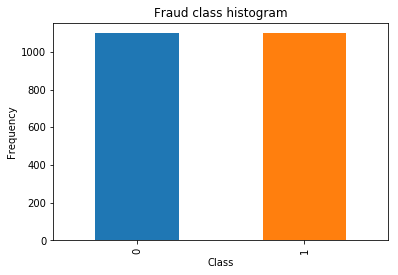

In [4]:
    
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

credit_cards1=pd.read_csv('sfc.csv')
credit_cards = credit_cards1.select_dtypes(include=[np.number])
#获取credit_cards表中列的名称
columns=credit_cards.columns
#删除最后一列，即class列
features_columns=columns.delete(len(columns)-1)
#获取除class列以外的所有特征列
features=credit_cards[features_columns]
#获取class列
labels=credit_cards['Class']
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0, 
                                                                            random_state=0)

#初始化SMOTE 模型
oversampler=SMOTE(random_state=0)
#使用SMOTE模型，创造新的数据集
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)
#切分新生成的数据集
os_features_train, os_features_test, os_labels_train, os_labels_test = train_test_split(os_features, 
                                                                            os_labels, 
                                                                            test_size=0.1,random_state=0 )

os_count_classes = pd.value_counts(os_labels, sort = True).sort_index()
os_count_classes.plot(kind = 'bar')
plt.title("defect class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features,os_labels)

